<a href="https://colab.research.google.com/github/nandinisingh16/Data-Science-Tool-and-Ecosystem/blob/main/ML_ALGOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LINEAR REGRESSION**


---- Linear Regression ----

Mean MSE: -0.5230499763383936


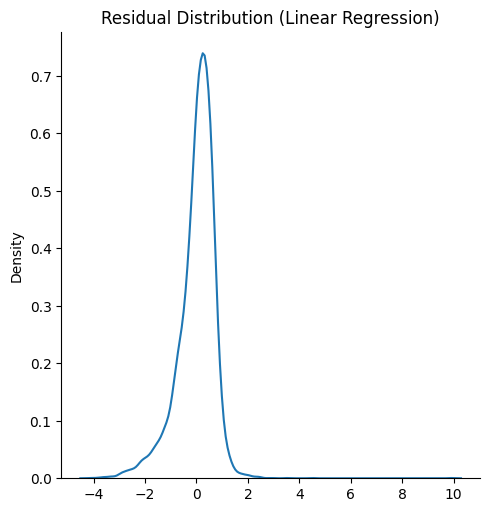

R2 Score: 0.5970494128783952


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

# Load dataset
df = fetch_california_housing()
dataset = pd.DataFrame(df.data, columns=df.feature_names)

X = dataset
y = df.target

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

# Scale features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# -------------------------
# Linear Regression
# -------------------------
print("\n---- Linear Regression ----\n")

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

mse = cross_val_score(lin_reg, x_train, y_train,
                      scoring='neg_mean_squared_error', cv=5)
print("Mean MSE:", np.mean(mse))

y_pred = lin_reg.predict(x_test)

sns.displot(y_pred - y_test, kind='kde')
plt.title("Residual Distribution (Linear Regression)")
plt.show()

print("R2 Score:", r2_score(y_test, y_pred))



**Ridge and Lasso and Elastic Net Implementation**



---- Ridge Regression ----

Best Alpha: {'alpha': 5}


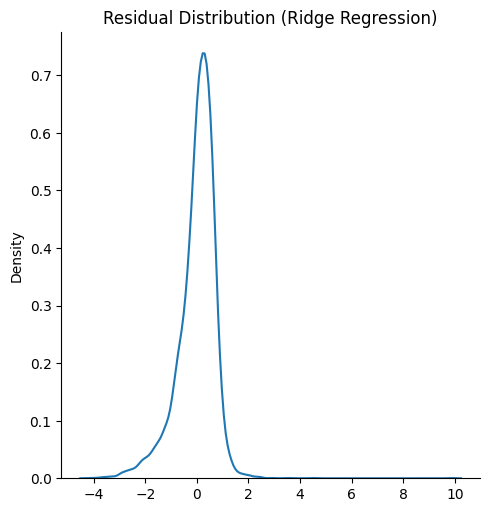

R2 Score: 0.5971332254609972

---- Lasso Regression ----

Best Alpha: {'alpha': 0.001}


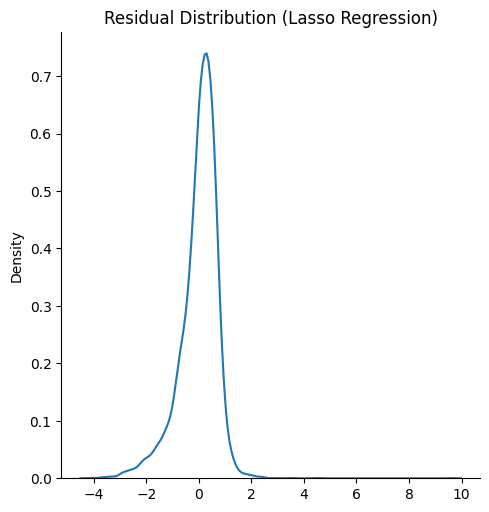

R2 Score: 0.5976154285751365

---- Elastic Net Regression ----

Best Parameters: {'alpha': 0.001, 'l1_ratio': 0.9}


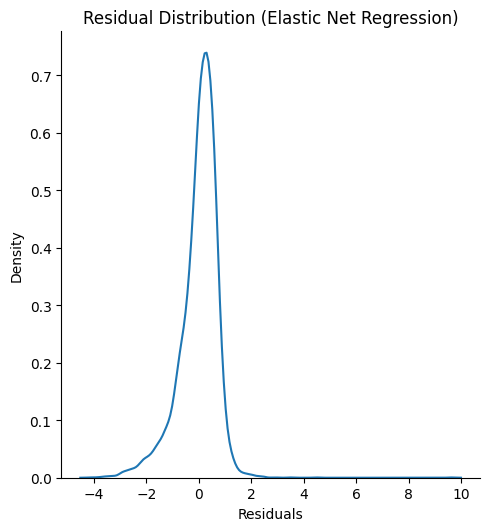

R2 Score: 0.5975817721719454


In [34]:

# -------------------------
# Ridge Regression
# -------------------------
print("\n---- Ridge Regression ----\n")

ridge = Ridge()
params = {'alpha': [0.01, 0.1, 1, 5, 10, 20, 30, 50, 100]}

ridge_cv = GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(x_train, y_train)

print("Best Alpha:", ridge_cv.best_params_)

ridge_pred = ridge_cv.predict(x_test)

sns.displot(ridge_pred - y_test, kind='kde')
plt.title("Residual Distribution (Ridge Regression)")
plt.show()

print("R2 Score:", r2_score(y_test, ridge_pred))


# -------------------------
# Lasso Regression
# -------------------------
print("\n---- Lasso Regression ----\n")

lasso = Lasso(max_iter=5000)
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10]}

lasso_cv = GridSearchCV(lasso, params, scoring='neg_mean_squared_error', cv=5)
lasso_cv.fit(x_train, y_train)

print("Best Alpha:", lasso_cv.best_params_)

lasso_pred = lasso_cv.predict(x_test)

sns.displot(lasso_pred - y_test, kind='kde')
plt.title("Residual Distribution (Lasso Regression)")
plt.show()

print("R2 Score:", r2_score(y_test, lasso_pred))


# -------------------------
# Elastic Net Regression
# -------------------------
print("\n---- Elastic Net Regression ----\n")

from sklearn.linear_model import ElasticNet

elastic = ElasticNet(max_iter=5000)

# Hyperparameter grid
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]   # mix of L1 and L2
}

elastic_cv = GridSearchCV(
    elastic,
    param_grid,
    scoring='neg_mean_squared_error',
    cv=5
)

elastic_cv.fit(x_train, y_train)

print("Best Parameters:", elastic_cv.best_params_)

elastic_pred = elastic_cv.predict(x_test)

# Residual plot
sns.displot(elastic_pred - y_test, kind='kde')
plt.title("Residual Distribution (Elastic Net Regression)")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.show()

# R2 Score
print("R2 Score:", r2_score(y_test, elastic_pred))


**LOgistic Regression and performance metrics**

Best Parameters: {'C': 1, 'l1_ratio': 0, 'max_iter': 300, 'penalty': 'l2'}
Best Cross-Validation Accuracy: 0.9846153846153847
Confusion Matrix:
 [[17  2]
 [ 0 13]]
Accuracy Score: 0.9375
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.87      1.00      0.93        13

    accuracy                           0.94        32
   macro avg       0.93      0.95      0.94        32
weighted avg       0.95      0.94      0.94        32

              sepal_length  sepal_width  petal_length  petal_width   species
sepal_length      1.000000     0.553855      0.828479     0.593709  0.494305
sepal_width       0.553855     1.000000      0.519802     0.566203  0.308080
petal_length      0.828479     0.519802      1.000000     0.823348  0.786424
petal_width       0.593709     0.566203      0.823348     1.000000  0.828129
species           0.494305     0.308080      0.786424     0.828129  1.000000


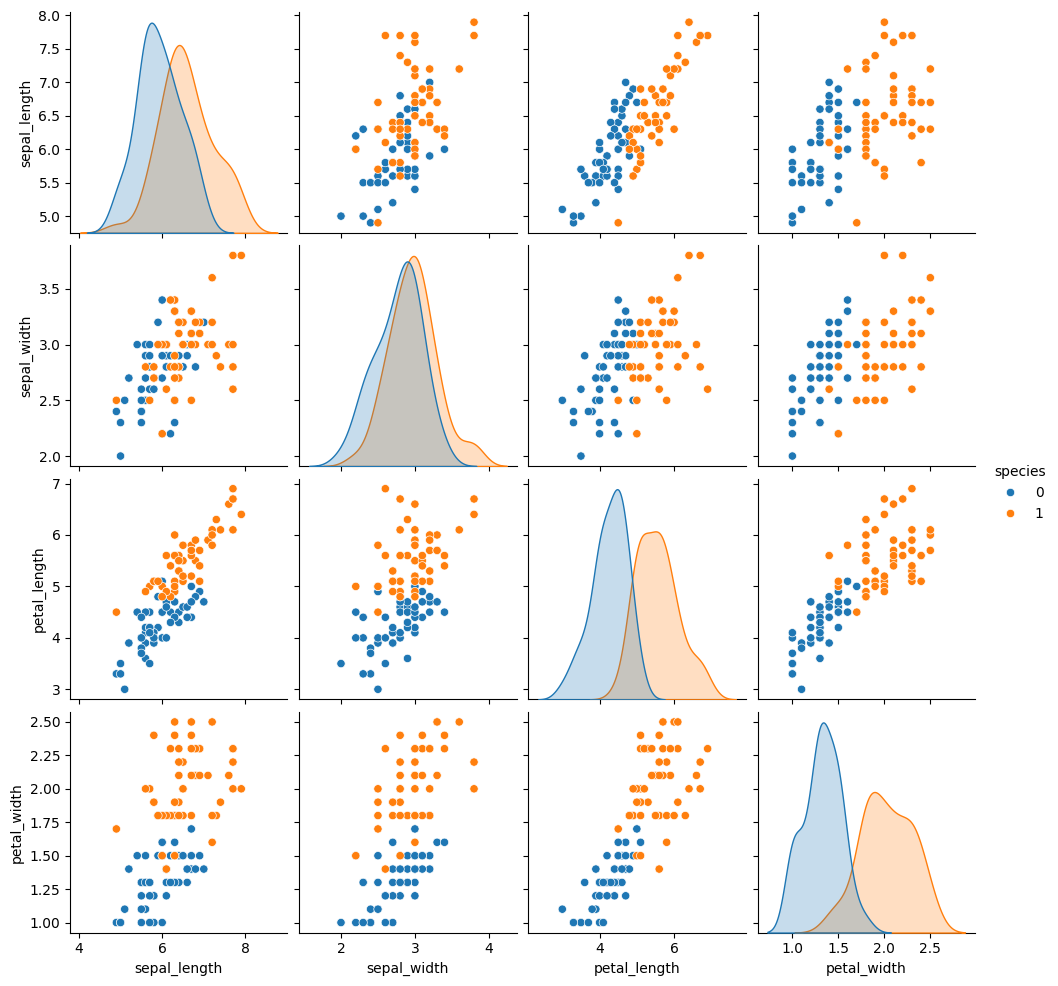

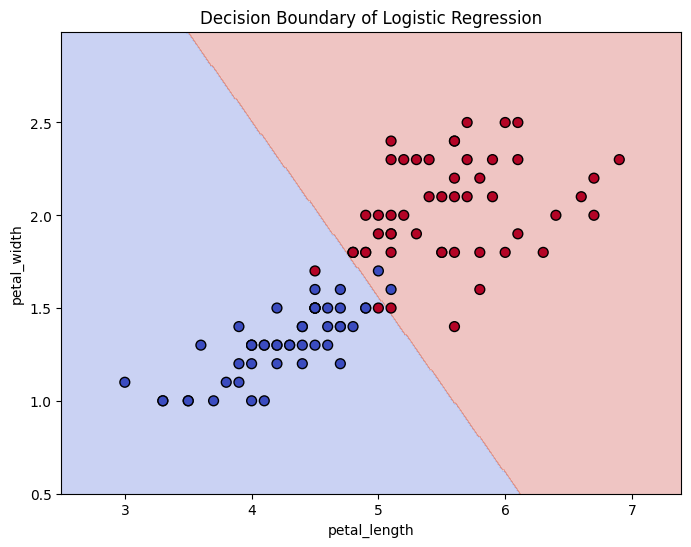

In [54]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = sns.load_dataset('iris')

# Remove setosa to make it binary classification
df = df[df['species'] != 'setosa']

# Map target to 0 and 1
df['species'] = df['species'].map({'versicolor': 0, 'virginica': 1})

# Features and target
X = df.drop('species', axis=1)
Y = df['species']

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.32, random_state=42)

# Logistic Regression + GridSearchCV
classifier = LogisticRegression(solver='saga')  # saga supports l1, l2, elasticnet
parameters = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [1,2,3,4,5,6,10,20,30,40,50],
    'max_iter': [100, 200, 300],
    'l1_ratio': [0, 0.5, 1]  # Only used if penalty='elasticnet'
}

classifierRegressor = GridSearchCV(classifier, param_grid=parameters, scoring='accuracy', cv=5)
classifierRegressor.fit(X_train, Y_train)

# Best parameters and score
print("Best Parameters:", classifierRegressor.best_params_)
print("Best Cross-Validation Accuracy:", classifierRegressor.best_score_)

# Predictions
y_pred = classifierRegressor.predict(X_test)

# Metrics
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("Accuracy Score:", accuracy_score(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))

# Correlation and pairplot
print(df.corr())
sns.pairplot(df, hue='species')



import matplotlib.pyplot as plt
import numpy as np

# Choose two features for visualization
feature1 = 'petal_length'
feature2 = 'petal_width'

X_vis = df[[feature1, feature2]].values
Y_vis = df['species'].values

# Train-test split
X_train_vis, X_test_vis, Y_train_vis, Y_test_vis = train_test_split(
    X_vis, Y_vis, test_size=0.32, random_state=42
)

# Train Logistic Regression with best parameters
best_params = classifierRegressor.best_params_

# l1_ratio only matters for elasticnet
if best_params['penalty'] == 'elasticnet':
    lr_vis = LogisticRegression(
        penalty=best_params['penalty'],
        C=best_params['C'],
        max_iter=best_params['max_iter'],
        solver='saga',
        l1_ratio=best_params['l1_ratio']
    )
else:
    lr_vis = LogisticRegression(
        penalty=best_params['penalty'],
        C=best_params['C'],
        max_iter=best_params['max_iter'],
        solver='saga'
    )

lr_vis.fit(X_train_vis, Y_train_vis)

# Create meshgrid
x_min, x_max = X_vis[:, 0].min() - 0.5, X_vis[:, 0].max() + 0.5
y_min, y_max = X_vis[:, 1].min() - 0.5, X_vis[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict on meshgrid
Z = lr_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=Y_vis, s=50, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Decision Boundary of Logistic Regression')
plt.show()



**Naive Bayees**

In [36]:
# IMPORTS
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# LOAD DATA
df = sns.load_dataset('iris')

# Keep only two classes for binary classification
df = df[df['species'] != 'setosa']
df['species'] = df['species'].map({'versicolor': 0, 'virginica': 1})

# FEATURES AND TARGET
X = df.drop('species', axis=1)
Y = df['species']

# TRAIN-TEST SPLIT
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42
)

# MODEL
model = GaussianNB()

# TRAIN
model.fit(X_train, Y_train)

# PREDICT
y_pred = model.predict(X_test)

# METRICS
print("Accuracy :", accuracy_score(Y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))


Accuracy : 0.9333333333333333

Confusion Matrix:
 [[17  0]
 [ 2 11]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       1.00      0.85      0.92        13

    accuracy                           0.93        30
   macro avg       0.95      0.92      0.93        30
weighted avg       0.94      0.93      0.93        30



**KNN**

In [37]:
# IMPORTS
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# LOAD DATA
df = sns.load_dataset('iris')

# Keep only 2 classes
df = df[df['species'] != 'setosa']
df['species'] = df['species'].map({'versicolor': 0, 'virginica': 1})

# FEATURES & TARGET
X = df.drop('species', axis=1)
Y = df['species']

# TRAIN-TEST SPLIT
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42
)

# ---- IMPORTANT ----
# KNN requires feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# MODEL
knn = KNeighborsClassifier(n_neighbors=5)

# TRAIN
knn.fit(X_train, Y_train)

# PREDICT
y_pred = knn.predict(X_test)

# METRICS
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))


Accuracy: 0.9

Confusion Matrix:
 [[16  1]
 [ 2 11]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.92      0.85      0.88        13

    accuracy                           0.90        30
   macro avg       0.90      0.89      0.90        30
weighted avg       0.90      0.90      0.90        30



**SVM Regressor and Classifier**


In [38]:
print("svm classifier")
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Only two classes for binary SVM
X = X[y != 0]
y = y[y != 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = SVC(kernel='rbf', C=1, gamma='scale')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("svm regressor")
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

df = fetch_california_housing()
X = df.data
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svr = SVR(kernel='rbf', C=10, epsilon=0.1, gamma='scale')
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


svm classifier
Accuracy: 0.9
              precision    recall  f1-score   support

           1       0.89      0.94      0.91        17
           2       0.92      0.85      0.88        13

    accuracy                           0.90        30
   macro avg       0.90      0.89      0.90        30
weighted avg       0.90      0.90      0.90        30

svm regressor
R2 Score: 0.75747760375865
MSE: 0.318320372109898


**Decision tree with post and pre prunning**


=== POST PRUNING (Cost Complexity Pruning) ===

Best alpha: 0.0
Best Accuracy: 0.9824561403508771


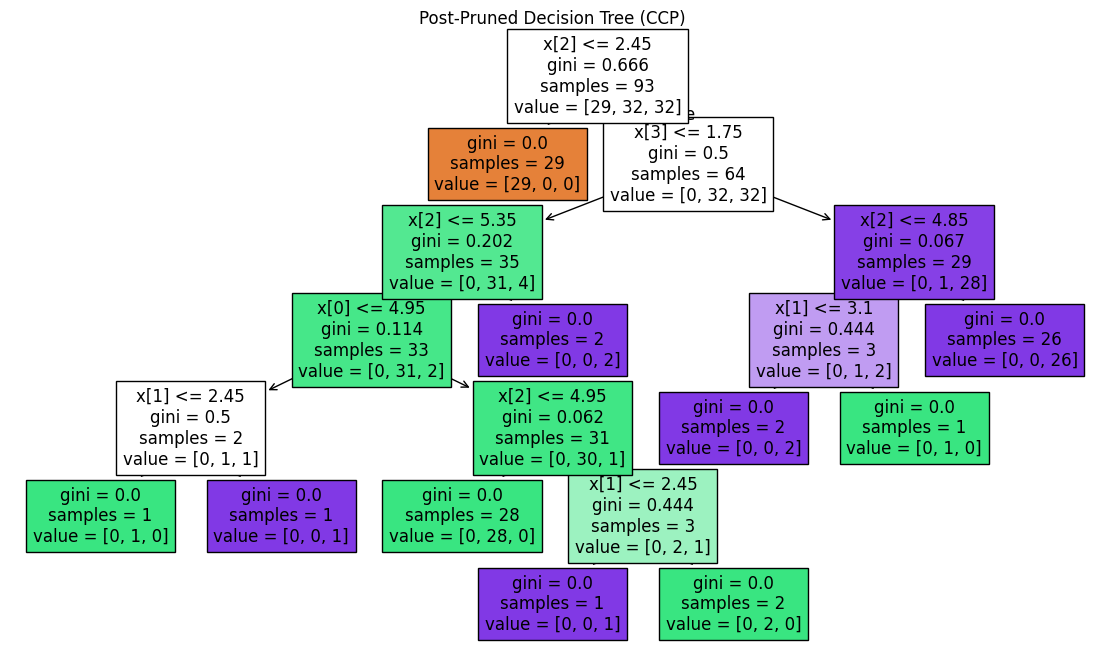

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.95      1.00      0.97        18
           2       1.00      0.94      0.97        18

    accuracy                           0.98        57
   macro avg       0.98      0.98      0.98        57
weighted avg       0.98      0.98      0.98        57


=== PRE PRUNING (Grid Search) ===

Best Params: {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'splitter': 'best'}
Best CV Score: 0.9362573099415205


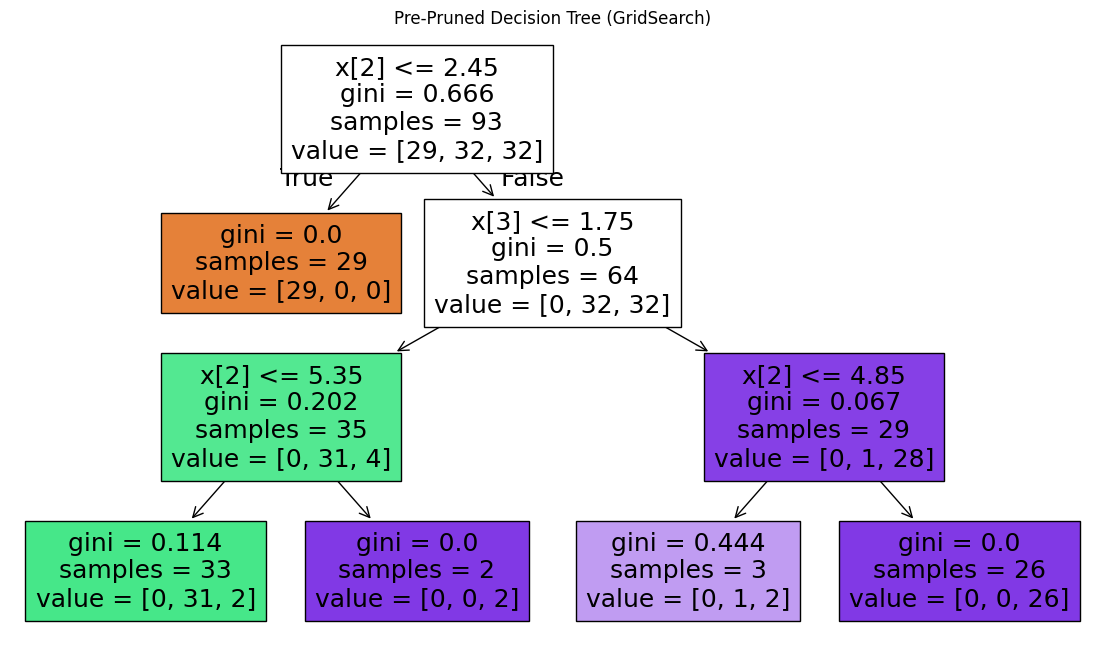

Test Accuracy: 0.9824561403508771
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.95      1.00      0.97        18
           2       1.00      0.94      0.97        18

    accuracy                           0.98        57
   macro avg       0.98      0.98      0.98        57
weighted avg       0.98      0.98      0.98        57



In [39]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# -----------------------------
# Load proper dataset
# -----------------------------
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.38, random_state=42
)

# =============================
# 1. POST-PRUNING (CCP)
# =============================

print("\n=== POST PRUNING (Cost Complexity Pruning) ===\n")

# Get cost complexity path
path = DecisionTreeClassifier(random_state=42).cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = path.ccp_alphas

models = []

for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=alpha, random_state=42)
    clf.fit(x_train, y_train)
    models.append(clf)

# Choose best model based on test accuracy
acc_scores = [m.score(x_test, y_test) for m in models]
best_alpha = ccp_alphas[np.argmax(acc_scores)]

best_post_tree = DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=42)
best_post_tree.fit(x_train, y_train)

print("Best alpha:", best_alpha)
print("Best Accuracy:", best_post_tree.score(x_test, y_test))

# Plot pruned tree
plt.figure(figsize=(14, 8))
tree.plot_tree(best_post_tree, filled=True)
plt.title("Post-Pruned Decision Tree (CCP)")
plt.show()

# Metrics
pred = best_post_tree.predict(x_test)
print(classification_report(y_test, pred))


# =============================
# 2. PRE PRUNING (GridSearchCV)
# =============================

print("\n=== PRE PRUNING (Grid Search) ===\n")

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5],
    'max_features': [None, 'sqrt', 'log2']
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(x_train, y_train)

print("Best Params:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

best_pre_tree = grid.best_estimator_

# Plot pre-pruned tree
plt.figure(figsize=(14, 8))
tree.plot_tree(best_pre_tree, filled=True)
plt.title("Pre-Pruned Decision Tree (GridSearch)")
plt.show()

# Metrics
pred2 = best_pre_tree.predict(x_test)
print("Test Accuracy:", accuracy_score(y_test, pred2))
print(classification_report(y_test, pred2))


**Decision Tree Regression**

In [43]:
from sklearn.datasets import fetch_california_housing
boston=fetch_california_housing()
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
x=pd.DataFrame(boston.data,columns=boston.feature_names)
y=boston.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
regressor=DecisionTreeRegressor()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

parameter = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4],
    'max_features': [None, 'sqrt']
}
cv=GridSearchCV(regressor,parameter,cv=5,scoring='neg_mean_squared_error')
cv.fit(x_train,y_train)
print("Best Params:", cv.best_params_)
print("Best CV Score:", cv.best_score_)
predd=cv.predict(x_test)
best_regressor = cv.best_estimator_
predd = best_regressor.predict(x_test)
print("R² Score:", r2_score(y_test, predd))

Best Params: {'criterion': 'squared_error', 'max_depth': 4, 'max_features': None, 'splitter': 'best'}
Best CV Score: -0.5661677095320641
R² Score: 0.5625625269029781


**Anomaly Detection**

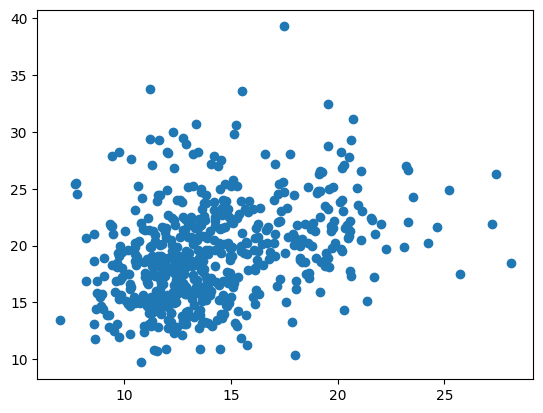

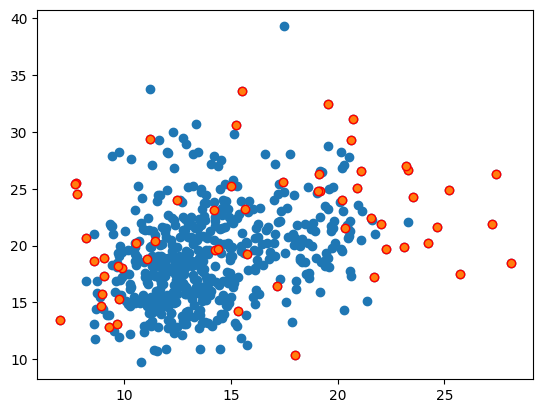

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import IsolationForest
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()
plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.show()
clf=IsolationForest(contamination='auto')
clf.fit(df)
prediction=clf.predict(df)
index=np.where(prediction<0)
x=df.values
plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.scatter(x[index,0],x[index,1],edgecolors="r")
plt.show()



**DBSCAN for anomaly detection**

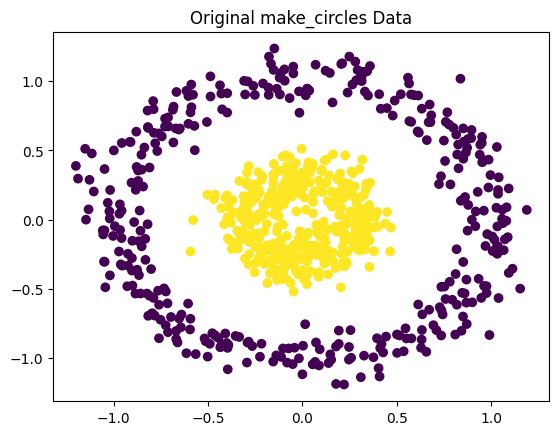

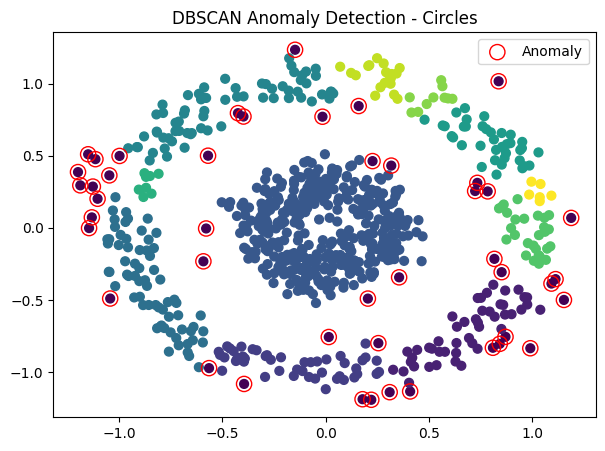

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_circles

# Generate circles
X, y = make_circles(n_samples=750, factor=0.3, noise=0.1)

# Original data plot
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Original make_circles Data")
plt.show()

# DBSCAN
db = DBSCAN(eps=0.1, min_samples=5)
labels = db.fit_predict(X)

# Anomalies are where label = -1
anomaly_idx = np.where(labels == -1)

# Plot clusters + anomalies
plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=40)
plt.scatter(X[anomaly_idx,0], X[anomaly_idx,1],
            edgecolors='r', facecolors='none', s=120, label="Anomaly")
plt.title("DBSCAN Anomaly Detection - Circles")
plt.legend()
plt.show()


**local outlier Factor anomaly detection**

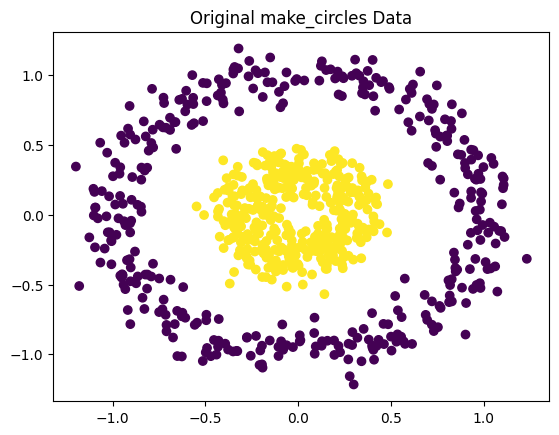

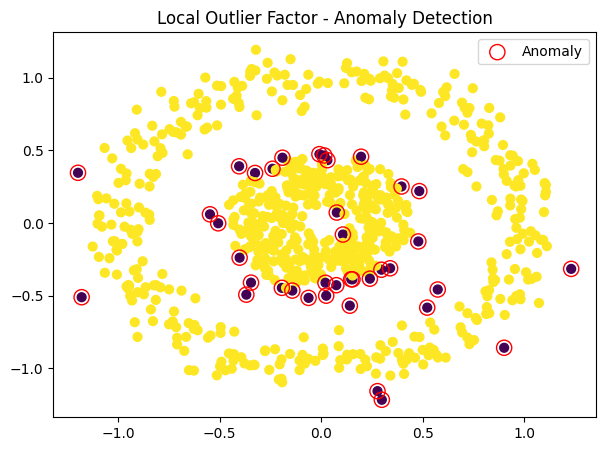

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_circles

# Generate circles dataset
X, y = make_circles(n_samples=750, factor=0.3, noise=0.1)

# Plot original data
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Original make_circles Data")
plt.show()

# LOF model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
labels = lof.fit_predict(X)

# LOF labels:
#  1  = normal
# -1  = anomaly
anomaly_idx = np.where(labels == -1)

# Plot results
plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=40)
plt.scatter(X[anomaly_idx,0], X[anomaly_idx,1],
            edgecolors='r', facecolors='none', s=120,
            label="Anomaly")
plt.title("Local Outlier Factor - Anomaly Detection")
plt.legend()
plt.show()


**Bagging + Random Forest + AdaBoost + Gradient Boosting**

In [56]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Load dataset
df = sns.load_dataset('iris')
df = df[df['species'] != 'setosa']              # Make it binary
df['species'] = df['species'].map({'versicolor': 0, 'virginica': 1})

X = df.drop('species', axis=1)
Y = df['species']

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42
)

# -------------------------
# BAGGING
# -------------------------
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(), # Changed from base_estimator to estimator
    n_estimators=50,
    max_samples=0.8,
    bootstrap=True,
    random_state=42
)
bag.fit(X_train, Y_train)
y_pred_bag = bag.predict(X_test)

print("\n=== Bagging Results ===")
print("Accuracy:", accuracy_score(Y_test, y_pred_bag))
print(confusion_matrix(Y_test, y_pred_bag))
print(classification_report(Y_test, y_pred_bag))

# -------------------------
# RANDOM FOREST
# -------------------------
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf.fit(X_train, Y_train)
y_pred_rf = rf.predict(X_test)

print("\n=== Random Forest Results ===")
print("Accuracy:", accuracy_score(Y_test, y_pred_rf))
print(confusion_matrix(Y_test, y_pred_rf))
print(classification_report(Y_test, y_pred_rf))

# -------------------------
# ADABOOST
# -------------------------
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)
ada.fit(X_train, Y_train)
y_pred_ada = ada.predict(X_test)

print("\n=== AdaBoost Results ===")
print("Accuracy:", accuracy_score(Y_test, y_pred_ada))
print(confusion_matrix(Y_test, y_pred_ada))
print(classification_report(Y_test, y_pred_ada))

# -------------------------
# GRADIENT BOOSTING
# -------------------------
gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb.fit(X_train, Y_train)
y_pred_gb = gb.predict(X_test)

print("\n=== Gradient Boosting Results ===")
print("Accuracy:", accuracy_score(Y_test, y_pred_gb))
print(confusion_matrix(Y_test, y_pred_gb))
print(classification_report(Y_test, y_pred_gb))



=== Bagging Results ===
Accuracy: 0.8
[[16  1]
 [ 5  8]]
              precision    recall  f1-score   support

           0       0.76      0.94      0.84        17
           1       0.89      0.62      0.73        13

    accuracy                           0.80        30
   macro avg       0.83      0.78      0.78        30
weighted avg       0.82      0.80      0.79        30


=== Random Forest Results ===
Accuracy: 0.8333333333333334
[[16  1]
 [ 4  9]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.86        17
           1       0.90      0.69      0.78        13

    accuracy                           0.83        30
   macro avg       0.85      0.82      0.82        30
weighted avg       0.84      0.83      0.83        30


=== AdaBoost Results ===
Accuracy: 0.8666666666666667
[[16  1]
 [ 3 10]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        17
           1       0.91   

**KMeans + Hierarchical + Dendrogram + Silhouette Score**

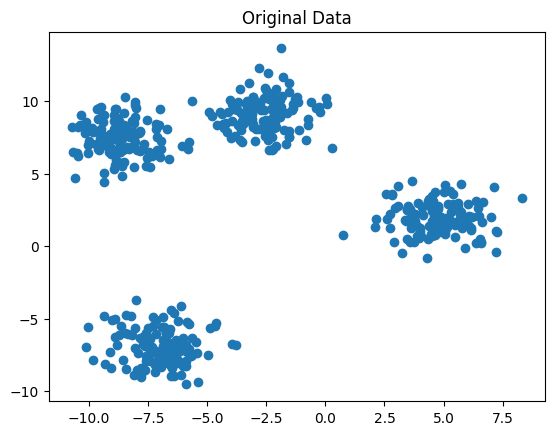

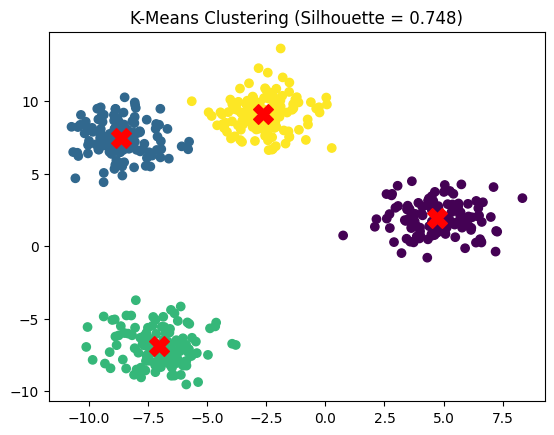

K-Means Silhouette Score: 0.7483022600632055


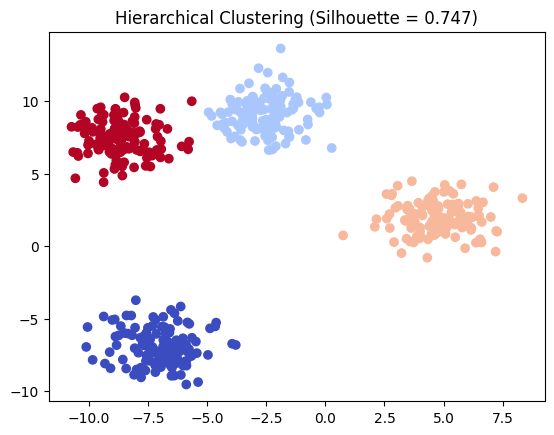

Hierarchical Silhouette Score: 0.7472592298855423


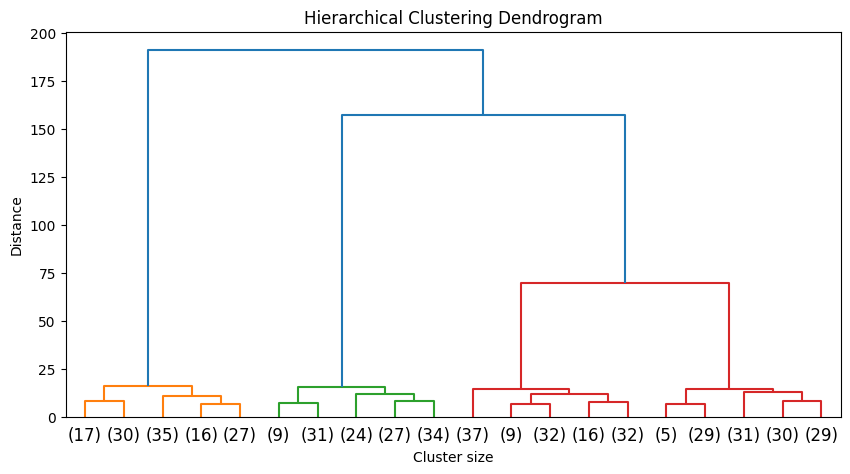

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# ---------------------------------------
# Generate dataset
# ---------------------------------------
X, y = make_blobs(n_samples=500, centers=4, cluster_std=1.2, random_state=42)

plt.scatter(X[:, 0], X[:, 1])
plt.title("Original Data")
plt.show()

# ---------------------------------------
# K-MEANS CLUSTERING
# ---------------------------------------
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
labels_kmeans = kmeans.fit_predict(X)

sil_kmeans = silhouette_score(X, labels_kmeans)

plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X')
plt.title(f"K-Means Clustering (Silhouette = {sil_kmeans:.3f})")
plt.show()

print("K-Means Silhouette Score:", sil_kmeans)

# ---------------------------------------
# HIERARCHICAL CLUSTERING (AGGLOMERATIVE)
# ---------------------------------------
hier = AgglomerativeClustering(n_clusters=4)
labels_hier = hier.fit_predict(X)

sil_hier = silhouette_score(X, labels_hier)

plt.scatter(X[:, 0], X[:, 1], c=labels_hier, cmap='coolwarm')
plt.title(f"Hierarchical Clustering (Silhouette = {sil_hier:.3f})")
plt.show()

print("Hierarchical Silhouette Score:", sil_hier)

# ---------------------------------------
# DENDROGRAM
# ---------------------------------------
linked = linkage(X, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='lastp', p=20)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster size")
plt.ylabel("Distance")
plt.show()


**Xg boost classifier and regressor**

In [59]:
# XGBoost Classifier & Regressor Example
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.datasets import load_breast_cancer
import numpy as np

# ------------------------------
# 1) XGBOOST CLASSIFIER
# ------------------------------
data_clf = load_breast_cancer()
X_clf = data_clf.data
y_clf = data_clf.target

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

model_clf = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss"
)

model_clf.fit(X_train_c, y_train_c)
y_pred_c = model_clf.predict(X_test_c)

print("XGBoost Classifier Accuracy:", accuracy_score(y_test_c, y_pred_c))

# ------------------------------
# 2) XGBOOST REGRESSOR
# ------------------------------
from sklearn.datasets import fetch_california_housing
data_reg = fetch_california_housing()
X_reg = data_reg.data
y_reg = data_reg.target

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

model_reg = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
)

model_reg.fit(X_train_r, y_train_r)
y_pred_r = model_reg.predict(X_test_r)

print("XGBoost Regressor RMSE:", np.sqrt(mean_squared_error(y_test_r, y_pred_r)))


XGBoost Classifier Accuracy: 0.9649122807017544
XGBoost Regressor RMSE: 0.48738578820806494
